In [1]:
import os
from IPython.display import display

In [2]:
# ROOT contais the project directory
os.chdir(os.path.dirname(os.getcwd()))

In [3]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

from src.Fundus import Fundus
from sklearn.cluster import AgglomerativeClustering

In [4]:
original = Fundus("data/noma/female_rank_0.png")

In [5]:
original.palette.shape

(46675, 3)

In [22]:
cluster = AgglomerativeClustering(n_clusters=len(original.palette)//6, affinity='euclidean', linkage='ward')  
clustered = cluster.fit_predict(original.palette)
print("Total number of colors before",len(clustered))
print("Total number of colors after ",len(np.unique(clustered)))

Total number of colors before 46675
Total number of colors after  7779


In [23]:
clustered

array([ 617,  617,  617, ..., 5000, 4910, 4910])

In [24]:
nc, cc = np.unique(clustered, return_counts=True)

In [25]:
np.unique(np.sort(cc), return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 162,  375,  556, 1517,  555, 1313,  344, 2350,  122,  364,   29,
          89,    1,    2]))

In [26]:
original.palette[clustered==1]

array([[128, 116,  84],
       [128, 120,  84],
       [128, 124,  80],
       [128, 124,  84],
       [132, 116,  80],
       [132, 116,  84],
       [132, 120,  80],
       [132, 120,  84],
       [132, 124,  80],
       [132, 124,  84]], dtype=uint8)

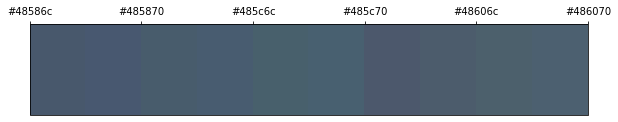

In [27]:
Fundus.plot_color_bar(original.palette[clustered==1])

In [28]:
a = np.zeros(original.pixels.shape, dtype=np.uint8)
lol=True
from tqdm import tqdm
for c in tqdm(np.unique(clustered)):
    if len(original.palette[clustered == c]) > 2:
        if lol:
            first = original.mask(original.palette[clustered == c], inverse=True, replacement=original.palette[clustered == c][0])
            lol = False
        a+=original.mask(original.palette[clustered == c], inverse=True, replacement=original.palette[clustered == c][0])

100%|██████████| 7779/7779 [04:54<00:00, 26.43it/s]


In [32]:
modified = Fundus(a, w=original.im.size[0], h=original.im.size[1])

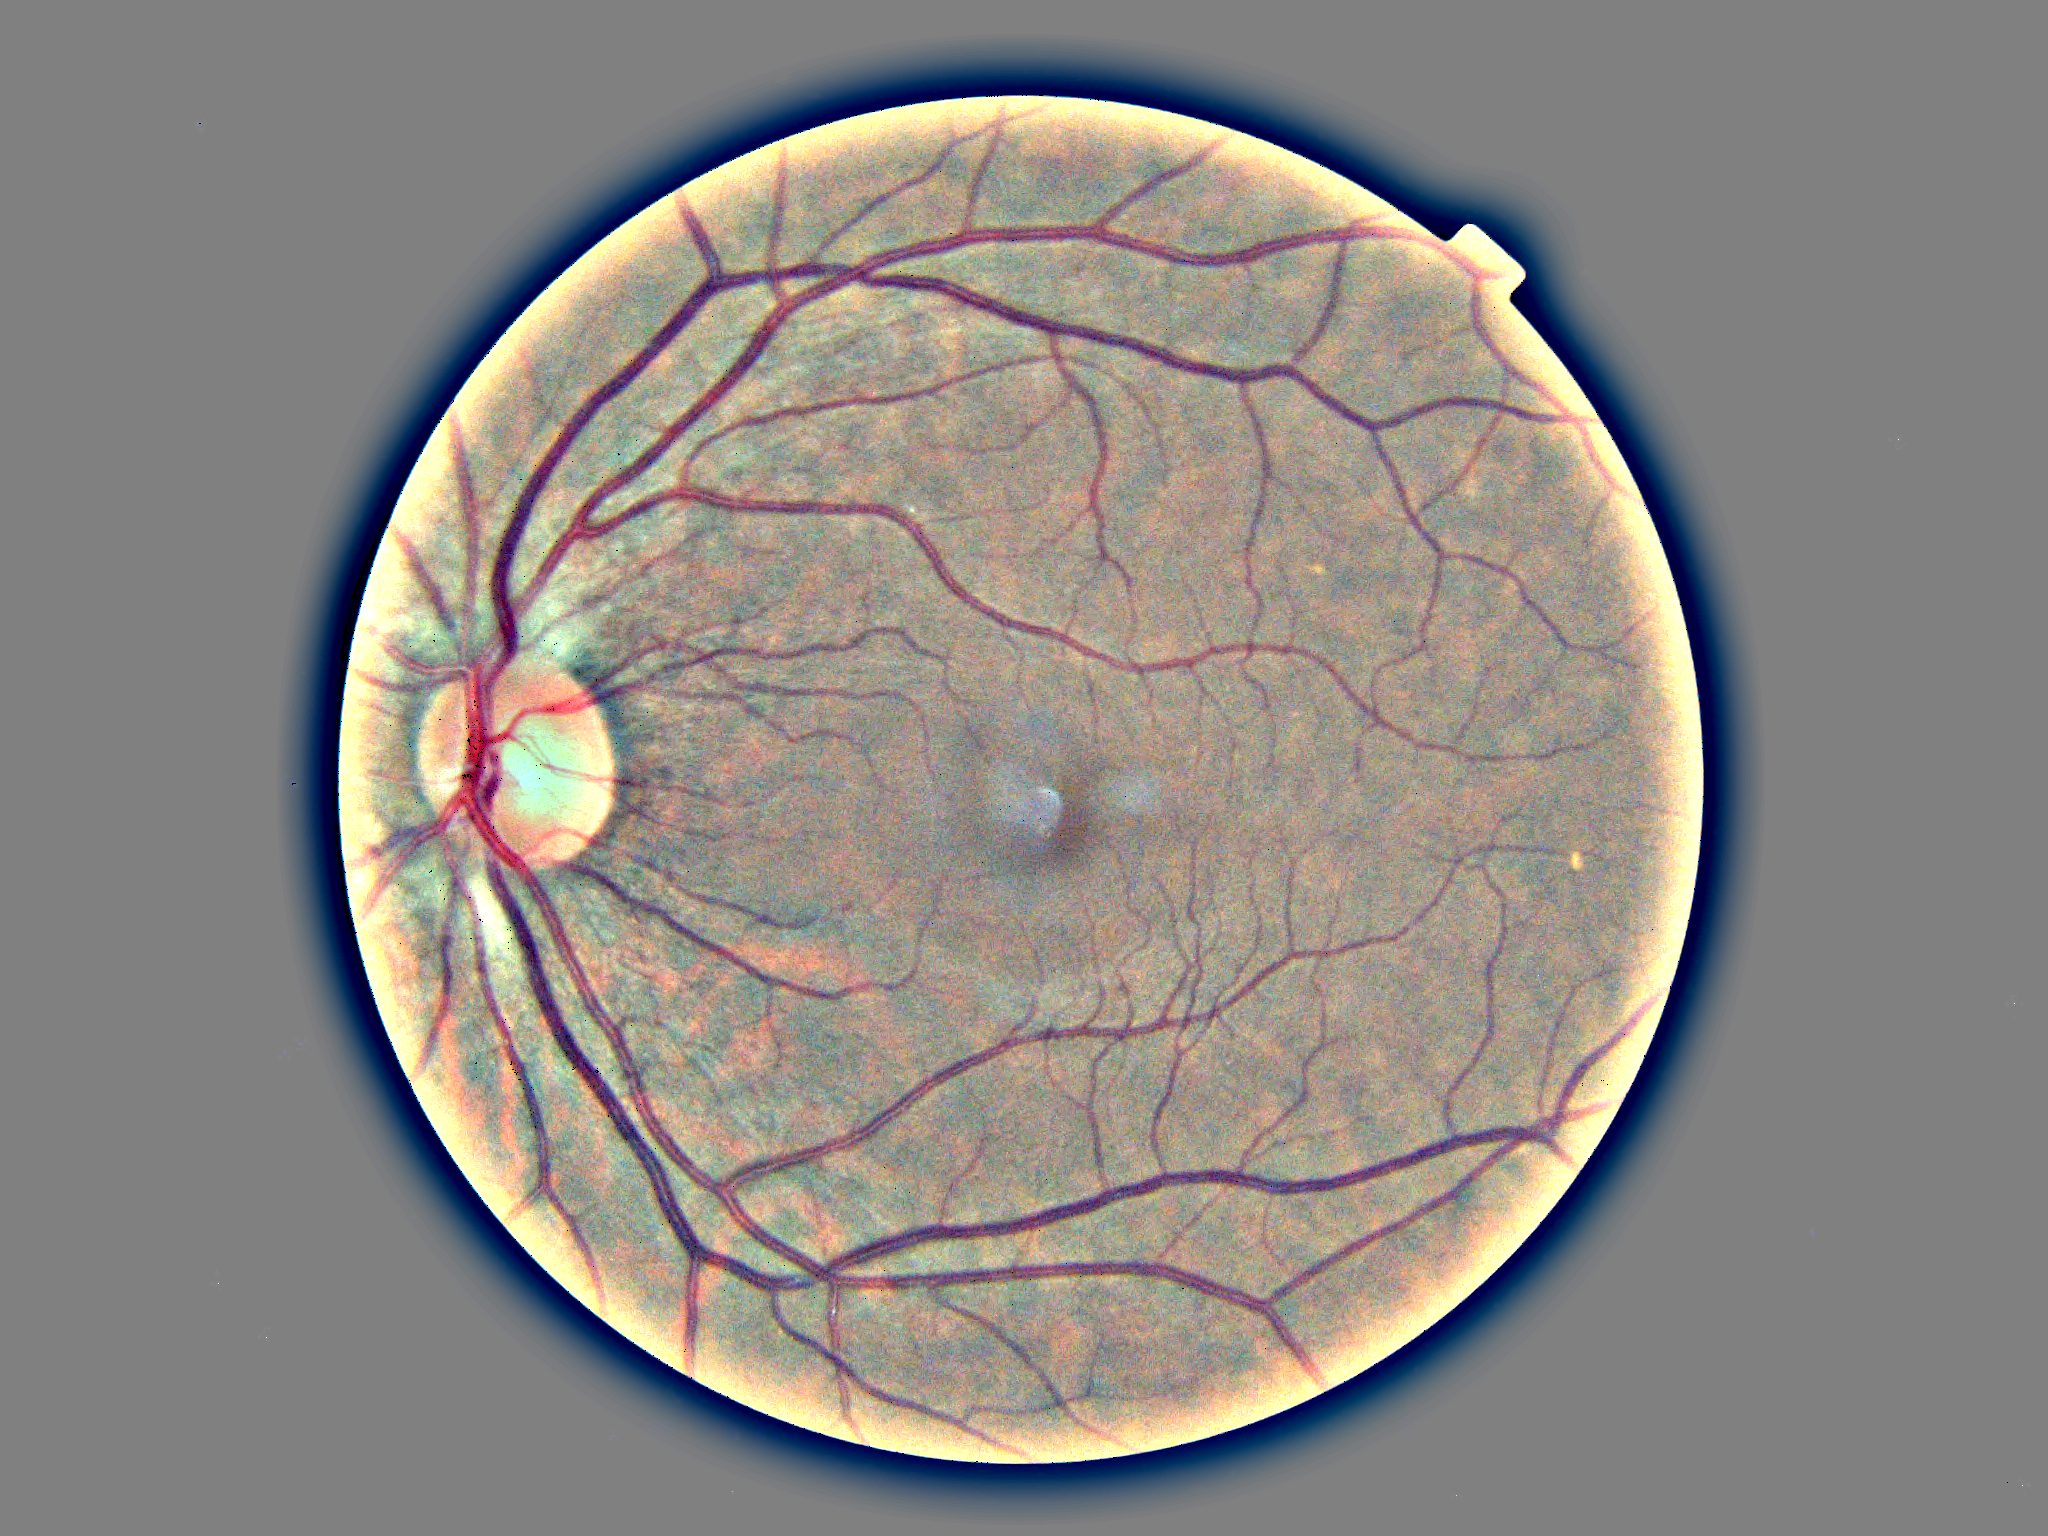

In [45]:
modified.im

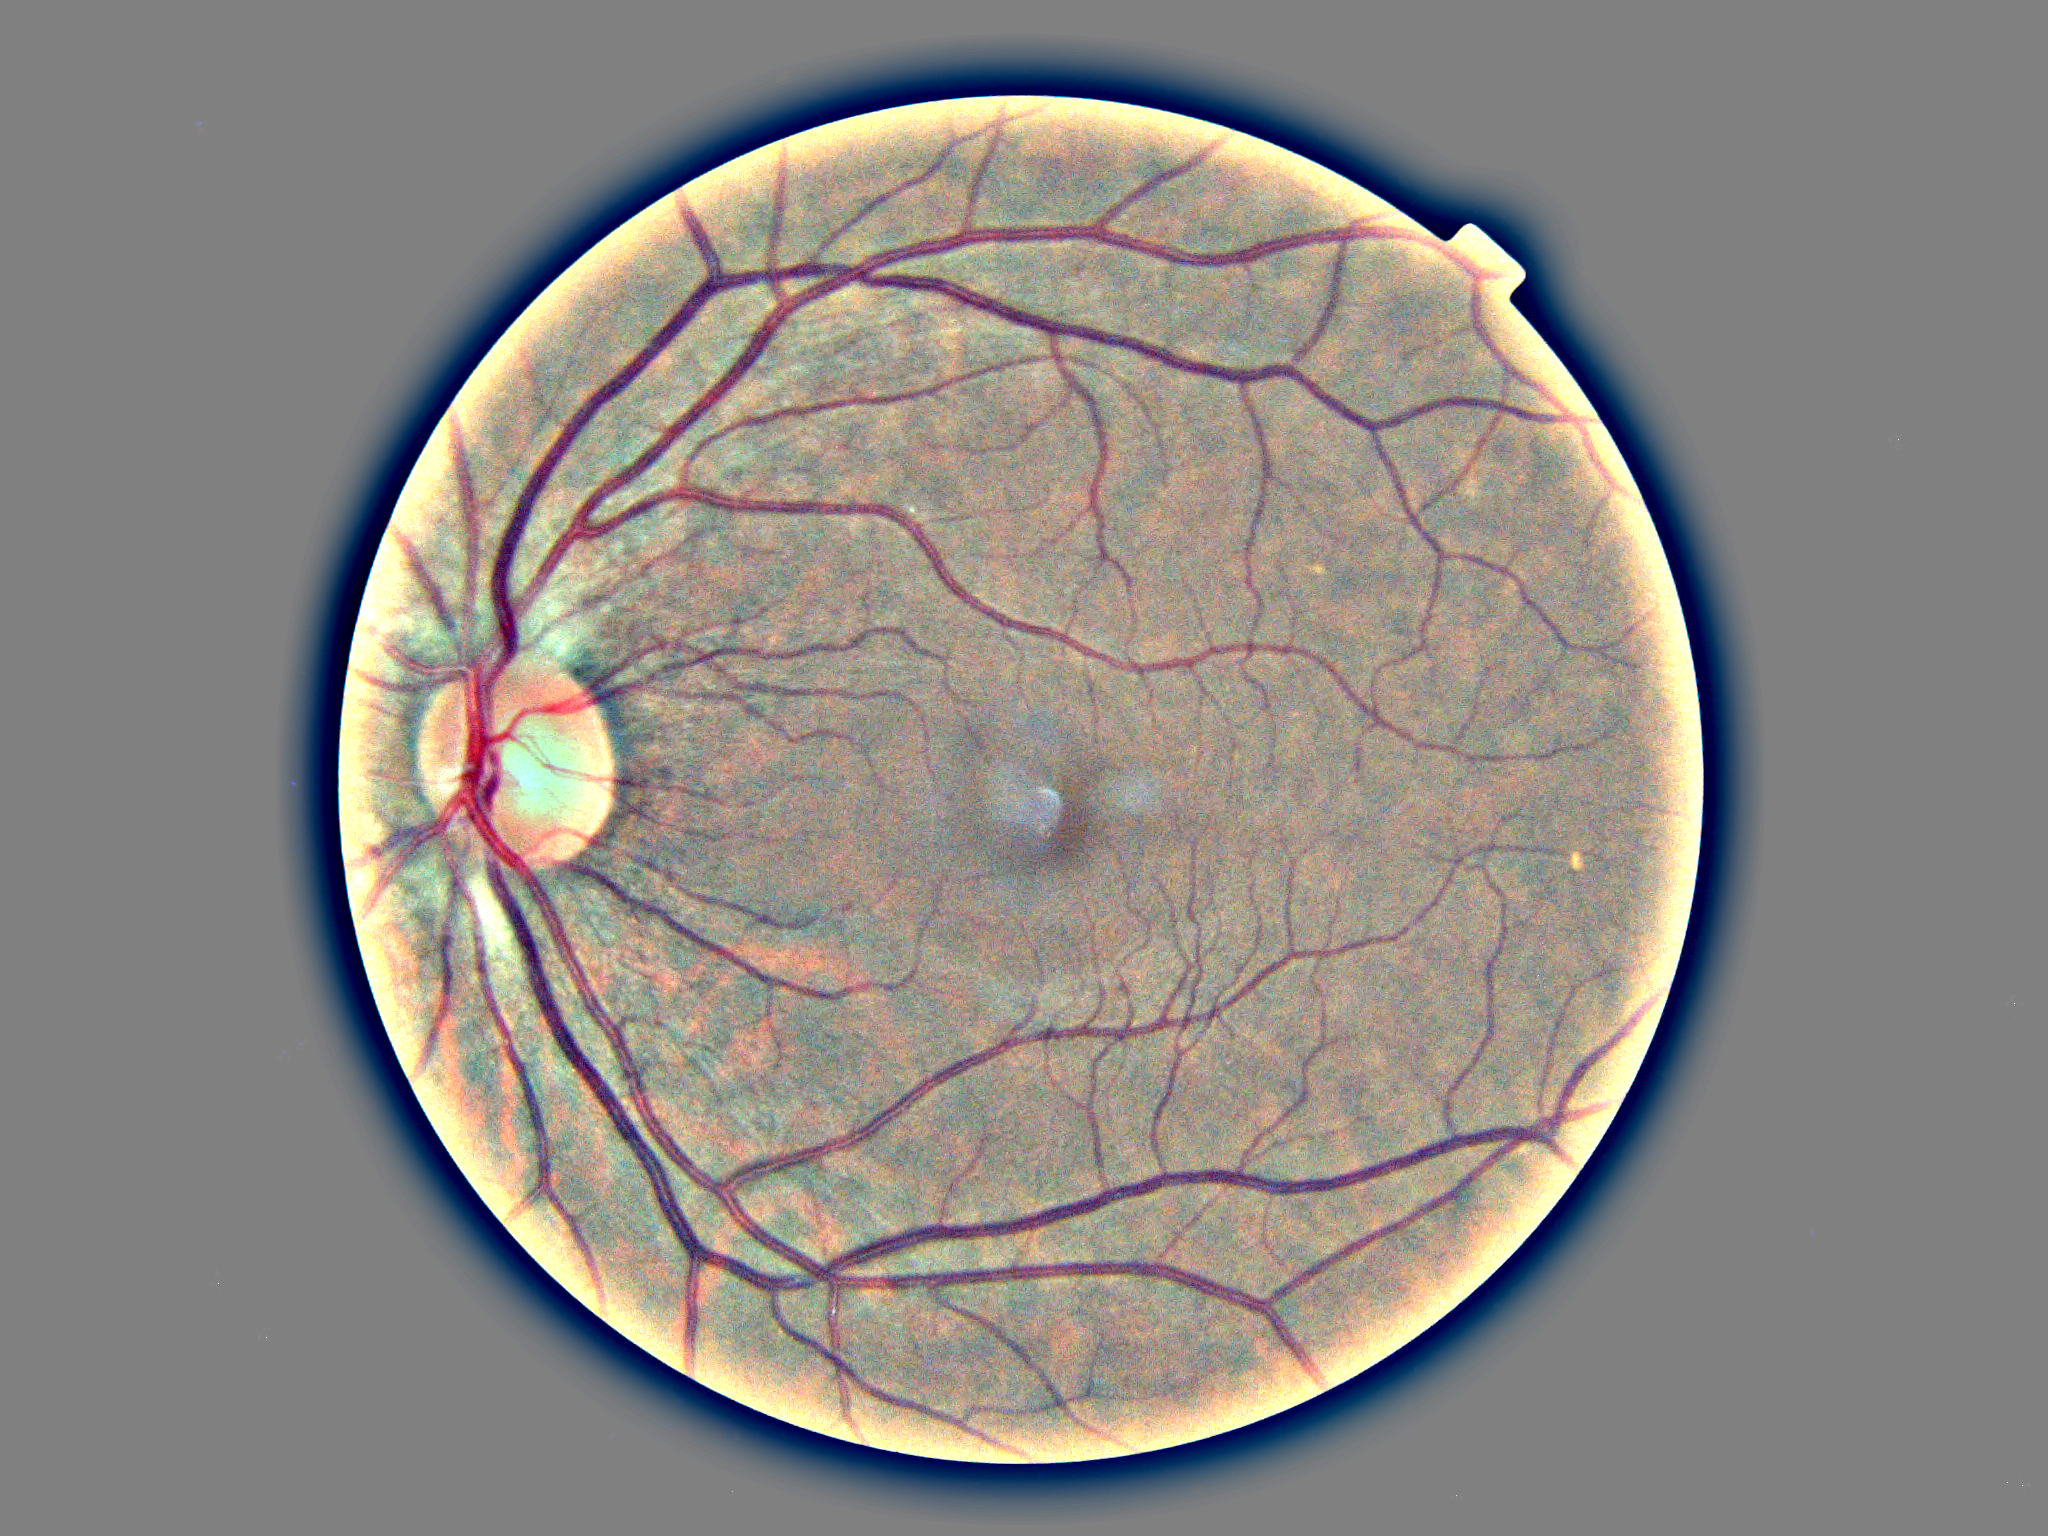

In [46]:
original.im

In [38]:
original.palette[clustered == c][0]

array([144, 112,  72], dtype=uint8)

In [39]:
original.palette[clustered == c]

array([[144, 112,  72],
       [144, 112,  76],
       [148, 112,  72],
       [148, 112,  76]], dtype=uint8)

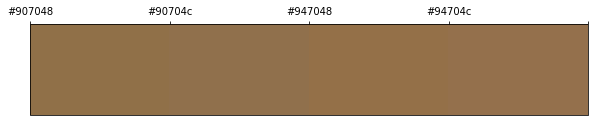

In [41]:
Fundus.plot_color_bar(original.palette[clustered == c])